# NeuralProphet

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/lab/blob/main/files/neuralprophet.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/lab/blob/main/files/neuralprophet.ipynb)

[NeuralProphet](https://github.com/ourownstory/neural_prophet) (Triebe et al., [2021](https://arxiv.org/abs/2111.15397)) is a successor to Meta's [Prophet](https://research.facebook.com/blog/2017/2/prophet-forecasting-at-scale/) for time series forecasting. It is inspired by AR-Net (Triebe et al., [2019](https://arxiv.org/abs/1911.12436)).

Note that this is a basic demonstration based on the [tutorial](https://neuralprophet.com/quickstart.html), adapted to use the Air Passengers dataset from [Statsmodels](https://github.com/statsmodels/statsmodels). The [`neuralprophet-data`](https://github.com/ourownstory/neuralprophet-data) repo has additional time series datasets to explore.

Also check out [KaTS](https://github.com/facebookresearch/Kats), [GluonTS](https://github.com/awslabs/gluonts), and [DarTS](https://github.com/unit8co/darts).

In [1]:
# WARNING: Not for JupyterLite/Pyodide
from datetime import datetime

import statsmodels.api as sm
from neuralprophet import NeuralProphet, set_log_level, set_random_seed

set_random_seed(42)
set_log_level("ERROR")

The [Air Passengers](https://www.rdocumentation.org/packages/datasets/topics/AirPassengers) dataset contains the monthly totals of international air travel passengers between 1949 and 1960.

In [2]:
ds = sm.datasets.get_rdataset("AirPassengers")
df = ds.data
df.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


We need to convert the dates from fractional to ISO 8601 format.

In [3]:
def parse_date(d):
    year = int(d)
    month = d - year
    month = round(month * 12) + 1
    return datetime(year, month, 1).strftime("%Y-%m-%d")


df["time"] = df["time"].apply(parse_date)
df.columns = ["ds", "y"]
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


NeuralProphet is meant to work out of the box but also be tunable.

In [4]:
# hyperparameters
SEASONALITY_MODE = "multiplicative"
BATCH_SIZE = 32
EPOCHS = 50

# build model
model = NeuralProphet(
    quantiles=[0.05, 0.95],
    seasonality_mode=SEASONALITY_MODE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
)
model.set_plotting_backend("matplotlib")

# 80/20 split (MS means "month start")
train_df, test_df = model.split_df(df, freq="MS", valid_p=0.20)

In [5]:
# train
metrics_train = model.fit(train_df, validation_df=test_df, freq="MS", progress=None)

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

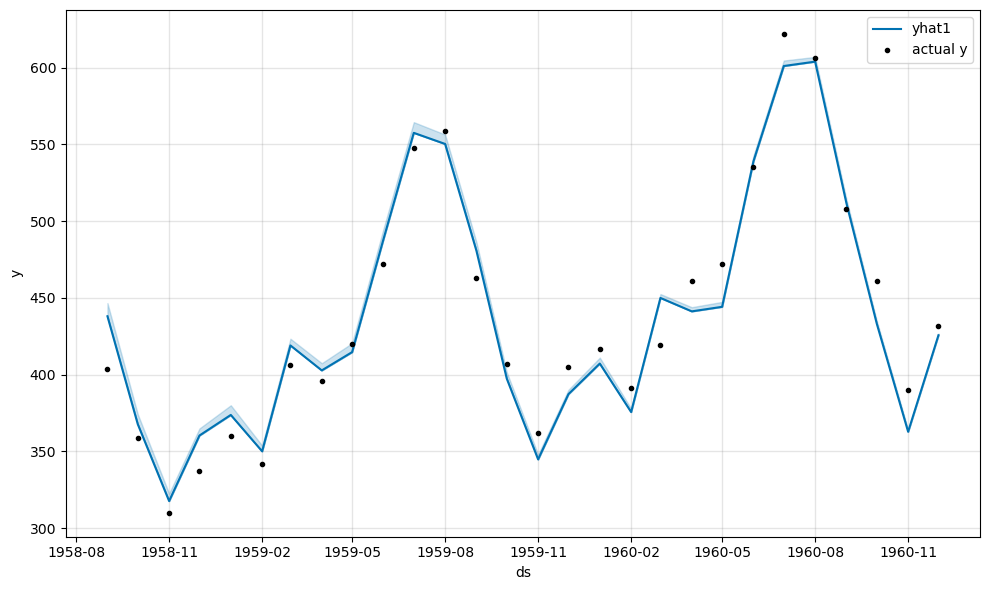

In [6]:
forecast = model.predict(test_df)
model.plot(forecast)

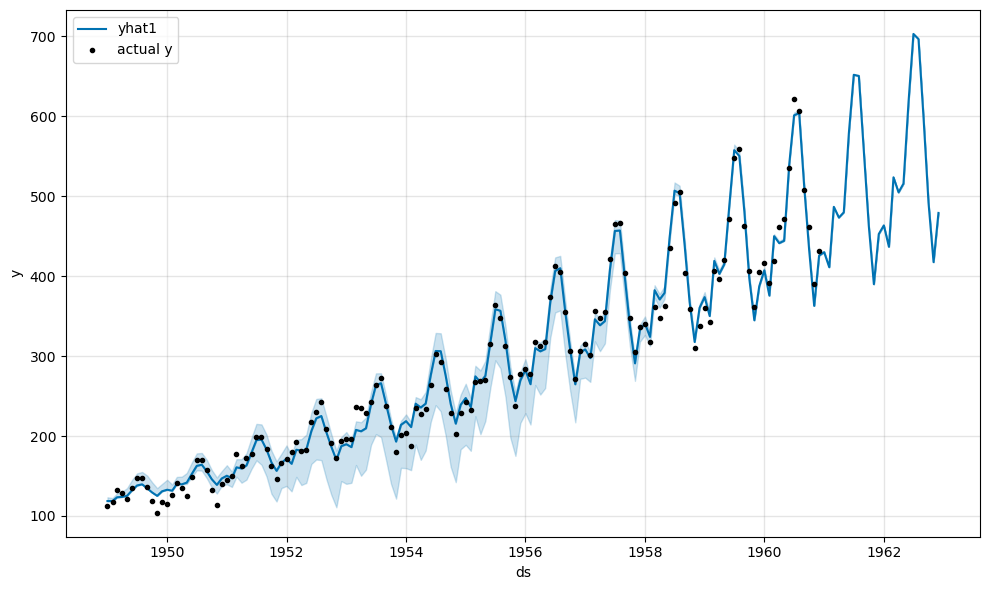

In [7]:
future_df = model.make_future_dataframe(df, periods=24, n_historic_predictions=len(df))
forecast = model.predict(future_df)
model.plot(forecast)

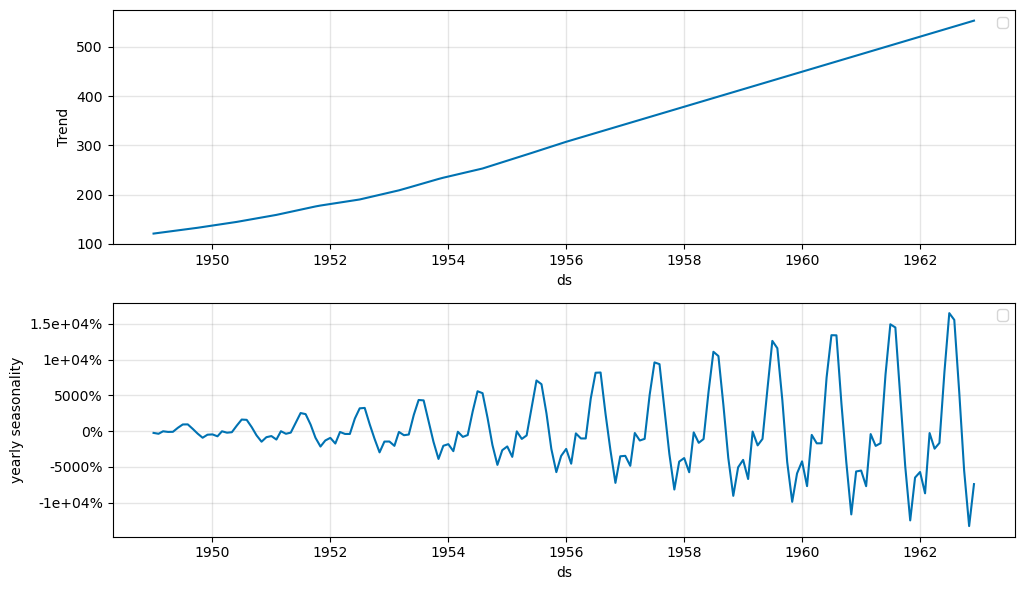

In [8]:
model.plot_components(forecast)

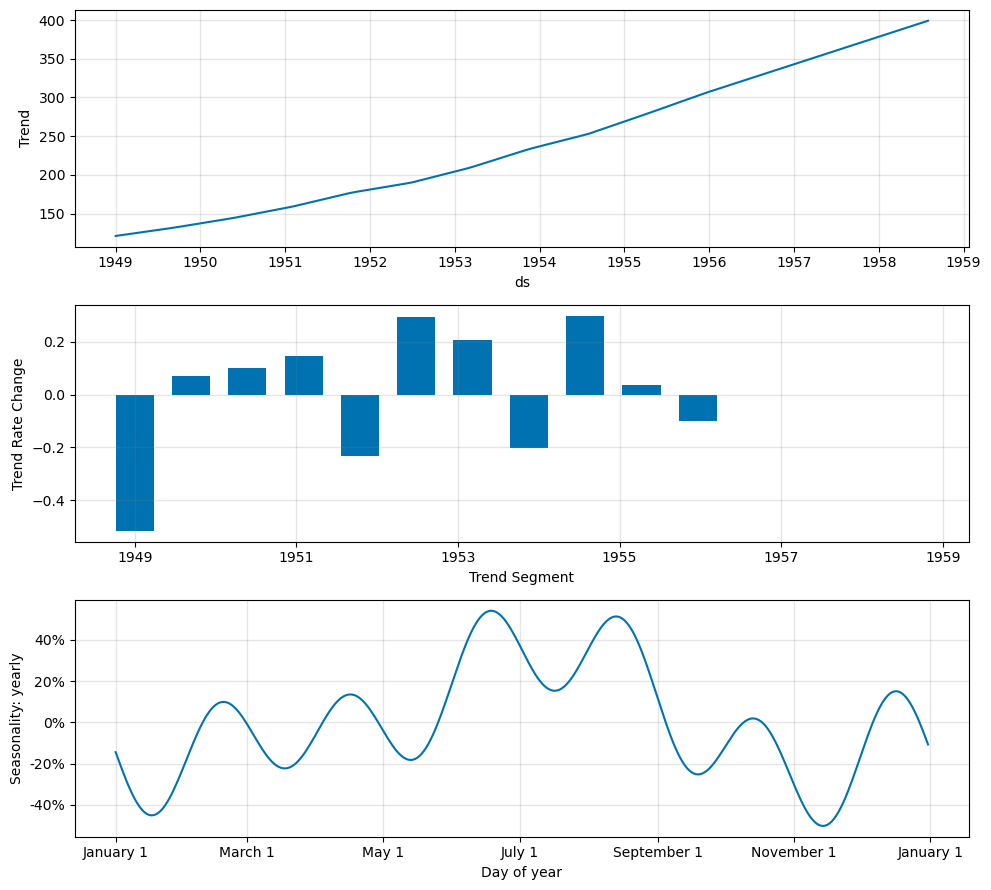

In [9]:
model.plot_parameters()